In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tahun                8544 non-null   int64 
 1   nama_provinsi        8544 non-null   object
 2   nama_kabupaten_kota  8544 non-null   object
 3   nama_kecamatan       8544 non-null   object
 4   nama_kelurahan       8544 non-null   object
 5   usia                 8544 non-null   object
 6   jenis_kelamin        8544 non-null   object
 7   jumlah_penduduk      8544 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 534.1+ KB


In [2]:
data = pd.read_csv("Data Covid19.csv")
data.head()

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0-4,Laki-laki,279
1,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,0-4,Laki-laki,116
2,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,0-4,Laki-laki,297
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0-4,Laki-laki,199
4,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,0-4,Laki-laki,97


In [6]:
data['nama_kecamatan'].unique()

array(['KEP. SERIBU UTR', 'KEP. SERIBU SLT', 'GAMBIR', 'SAWAH BESAR',
       'KEMAYORAN', 'SENEN', 'CEMPAKA PUTIH', 'MENTENG', 'TANAH ABANG',
       'JOHAR BARU', 'PENJARINGAN', 'TANJUNG PRIOK', 'KOJA', 'CILINCING',
       'PADEMANGAN', 'KELAPA GADING', 'CENGKARENG', 'GROGOL PETAMBURAN',
       'TAMAN SARI', 'TAMBORA', 'KEBON JERUK', 'KALI DERES', 'PALMERAH',
       'KEMBANGAN', 'TEBET', 'SETIA BUDI', 'MAMPANG PRAPATAN',
       'PASAR MINGGU', 'KEBAYORAN LAMA', 'CILANDAK', 'KEBAYORAN BARU',
       'PANCORAN', 'JAGAKARSA', 'PESANGGRAHAN', 'MATRAMAN', 'PULO GADUNG',
       'JATINEGARA', 'KRAMAT JATI', 'PASAR REBO', 'CAKUNG', 'DUREN SAWIT',
       'MAKASAR', 'CIRACAS', 'CIPAYUNG'], dtype=object)

In [7]:
highest_covid = 'KEP. SERIBU UTR'
data[data['nama_kecamatan']==highest_covid]

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0-4,Laki-laki,279
1,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,0-4,Laki-laki,116
2,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,0-4,Laki-laki,297
267,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,9-May,Laki-laki,320
268,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,9-May,Laki-laki,110
...,...,...,...,...,...,...,...,...
8011,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,70-74,Perempuan,5
8012,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,70-74,Perempuan,25
8277,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,>75,Perempuan,27
8278,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,>75,Perempuan,8


In [22]:
unique_wilayah = data[data.tahun>0]['nama_kabupaten_kota'].unique()
unique_wilayah.sort()
unique_wilayah

array(['JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN',
       'JAKARTA TIMUR', 'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],
      dtype=object)

In [23]:
country_tahun_case = []
for i in unique_wilayah:
  country_tahun_case.append(data[data.tahun>0][data['nama_kabupaten_kota']==i][data['nama_kecamatan']==highest_covid].tahun.sum())
  

<ipython-input-23-fe25b5ac6499>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_tahun_case.append(data[data.tahun>0][data['nama_kabupaten_kota']==i][data['nama_kecamatan']==highest_covid].tahun.sum())


In [14]:
print(set(zip(unique_wilayah, country_jumlah_penduduk_case)))

{('JAKARTA UTARA', 0), ('JAKARTA PUSAT', 0), ('KAB.ADM.KEP.SERIBU', 14717), ('JAKARTA BARAT', 0), ('JAKARTA TIMUR', 0), ('JAKARTA SELATAN', 0)}


In [24]:
unique_provinces = data['nama_provinsi'][data.tahun>1].unique()
unique_provinces

array(['PROVINSI DKI JAKARTA'], dtype=object)

In [25]:
province_jumlah_penduduk_case = []
for i in unique_provinces:
  province__jumlah_penduduk_case.append(data[data.jumlah_penduduk>0][data['nama_provinsi']==i][data['nama_kecamatan']==highest_covid].jumlah_penduduk.sum())

NameError: ignored

In [27]:
print(set(zip(unique_provinces, province_tahun_case)))

set()


In [28]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [30]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_tahun_case)

In [31]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_tahun_case.pop(i)

unique_provinces

['PROVINSI DKI JAKARTA']

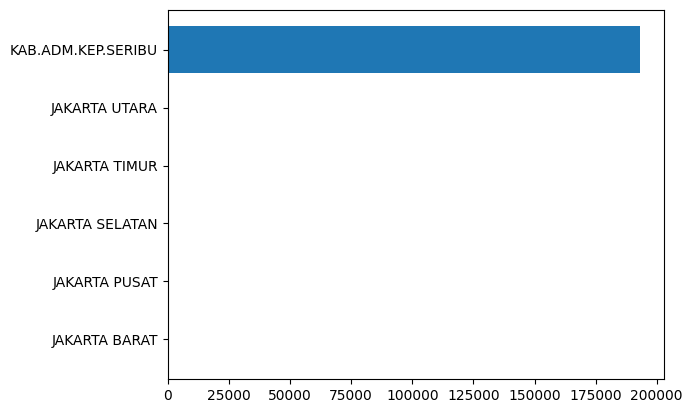

In [34]:
plt.barh(unique_wilayah, country_tahun_case)
plt.show()

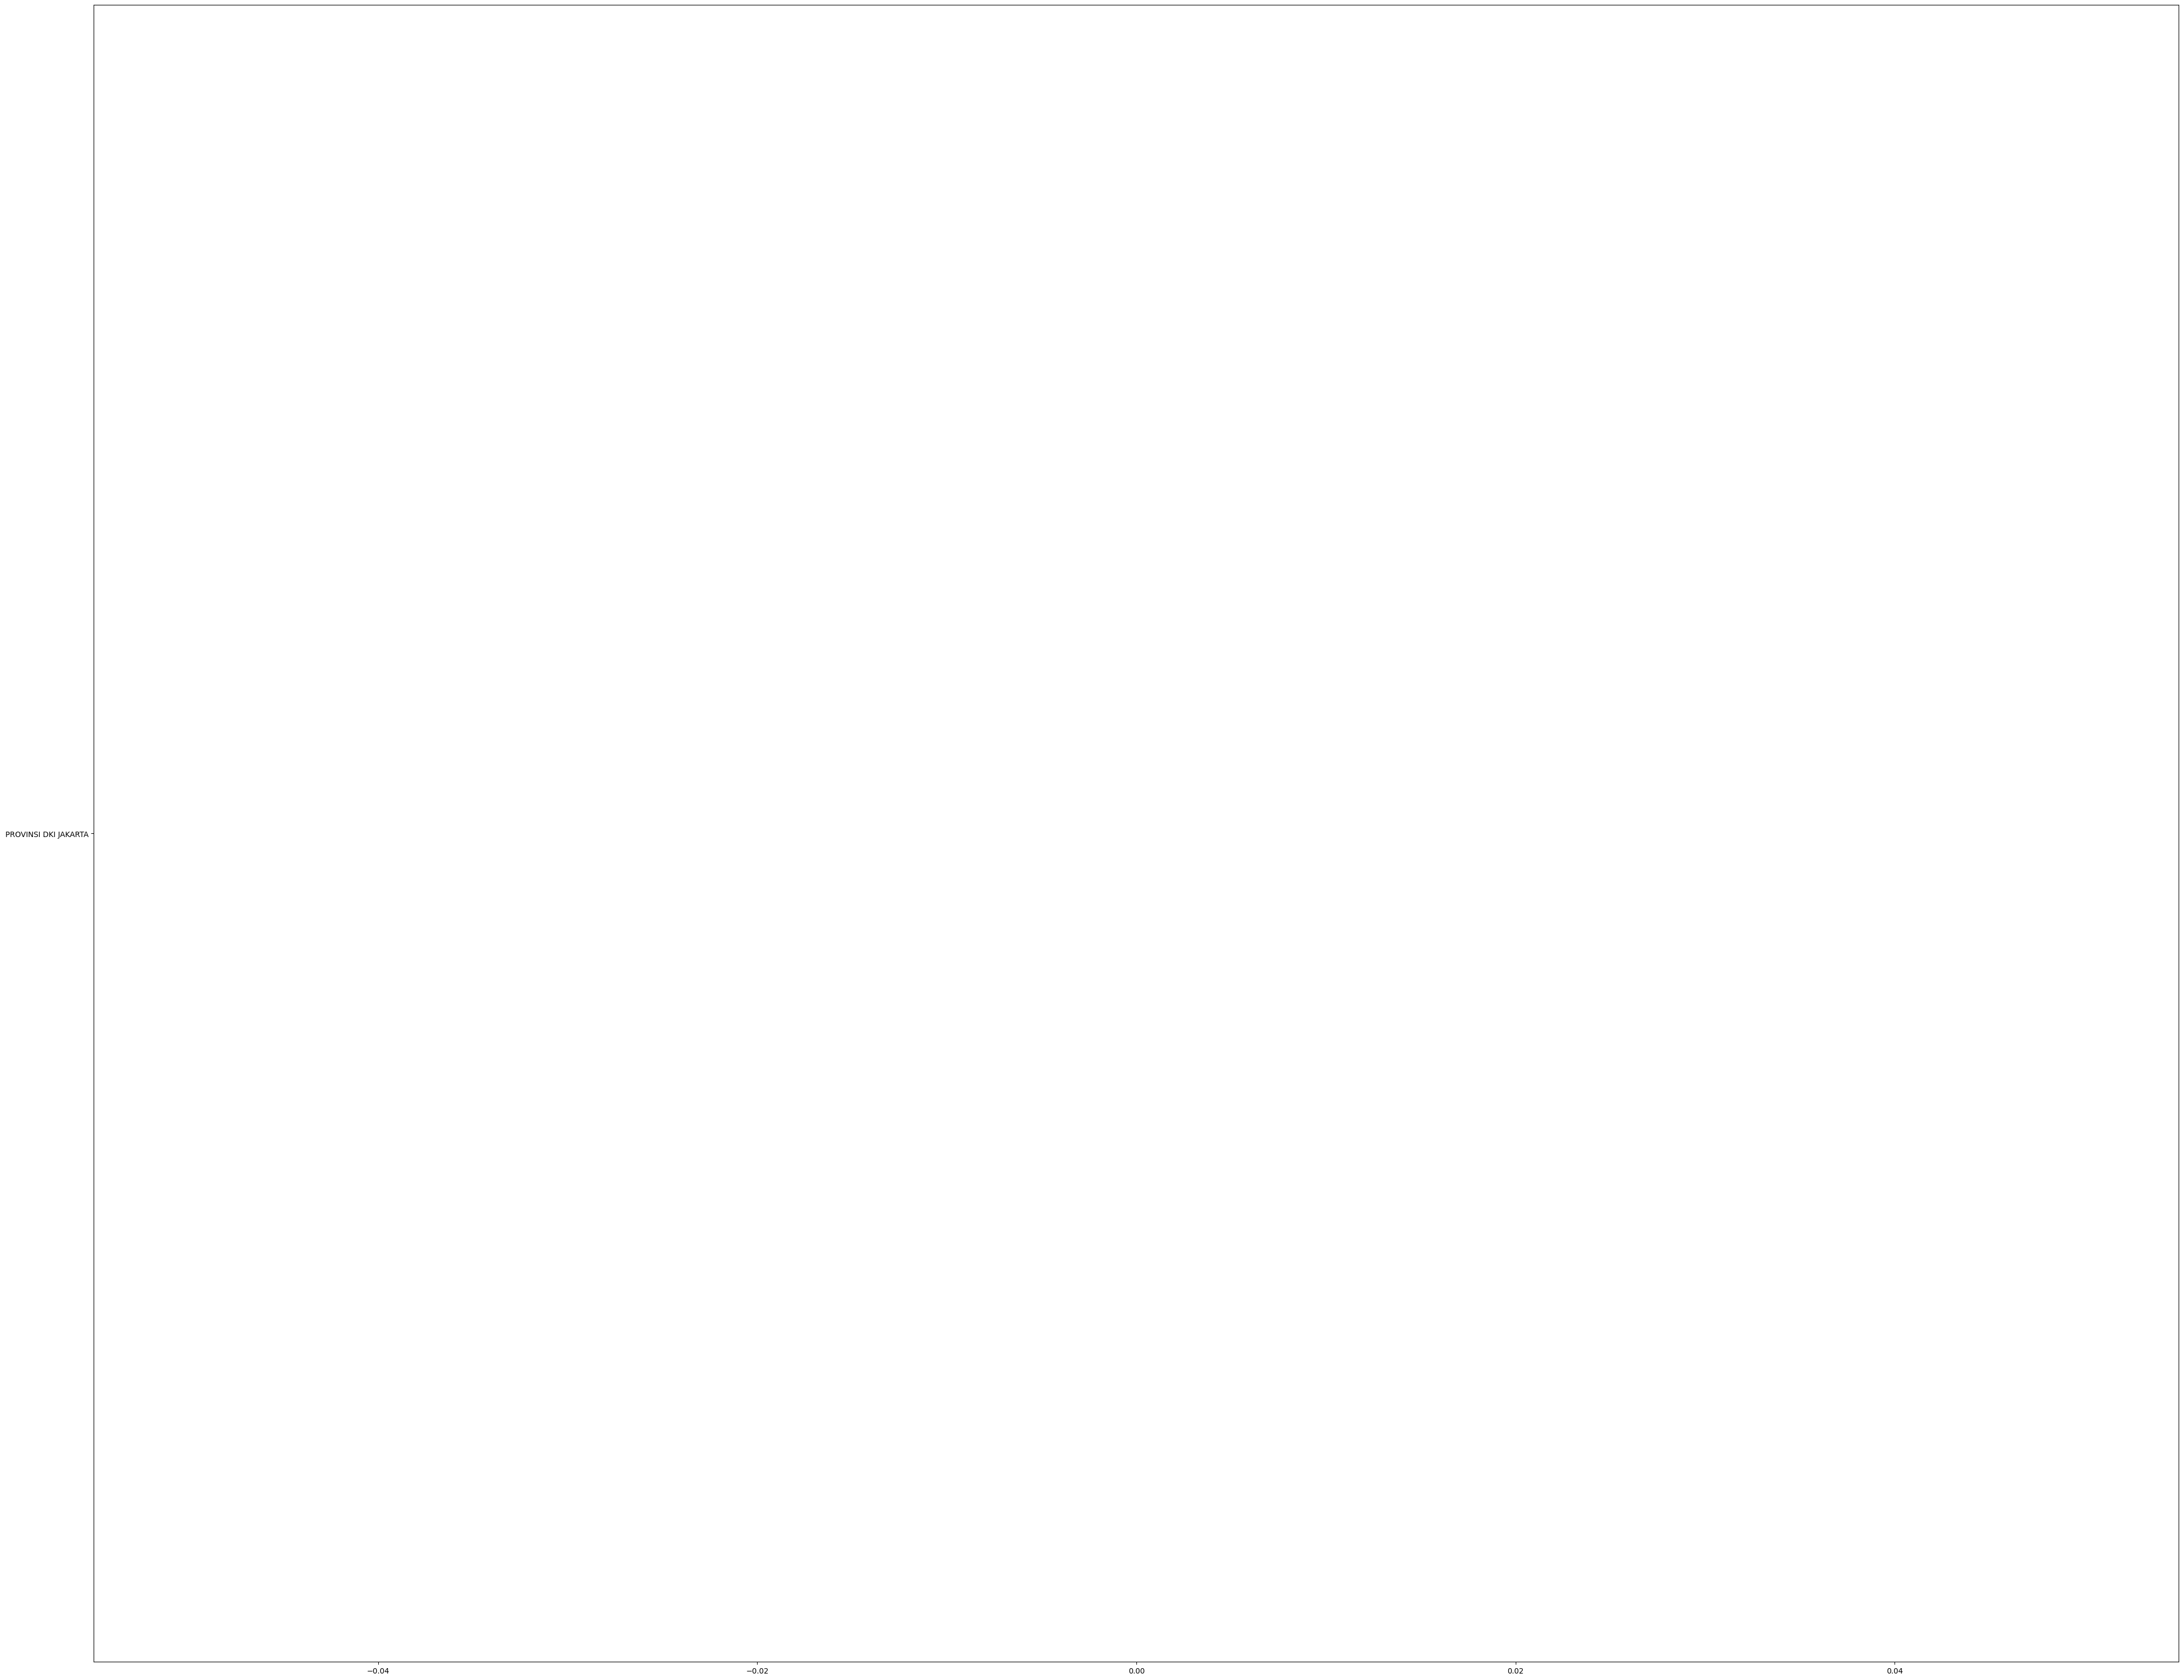

In [36]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_jumlah_penduduk_case)
plt.show()

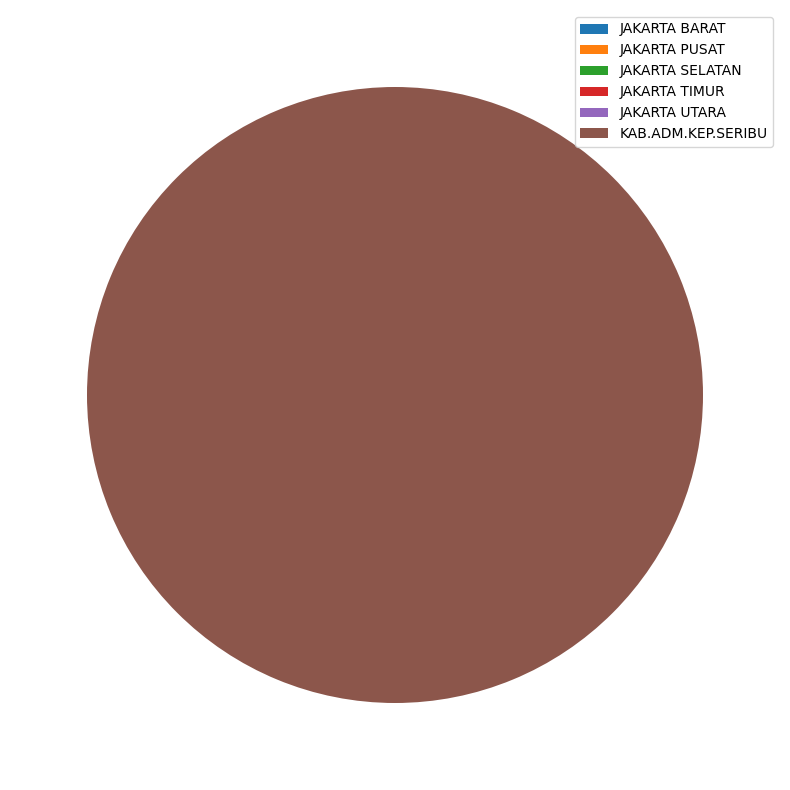

In [38]:
plt.figure(figsize=(10,10))
plt.pie(country_jumlah_penduduk_case)
plt.legend(unique_wilayah, loc='best')
plt.show()

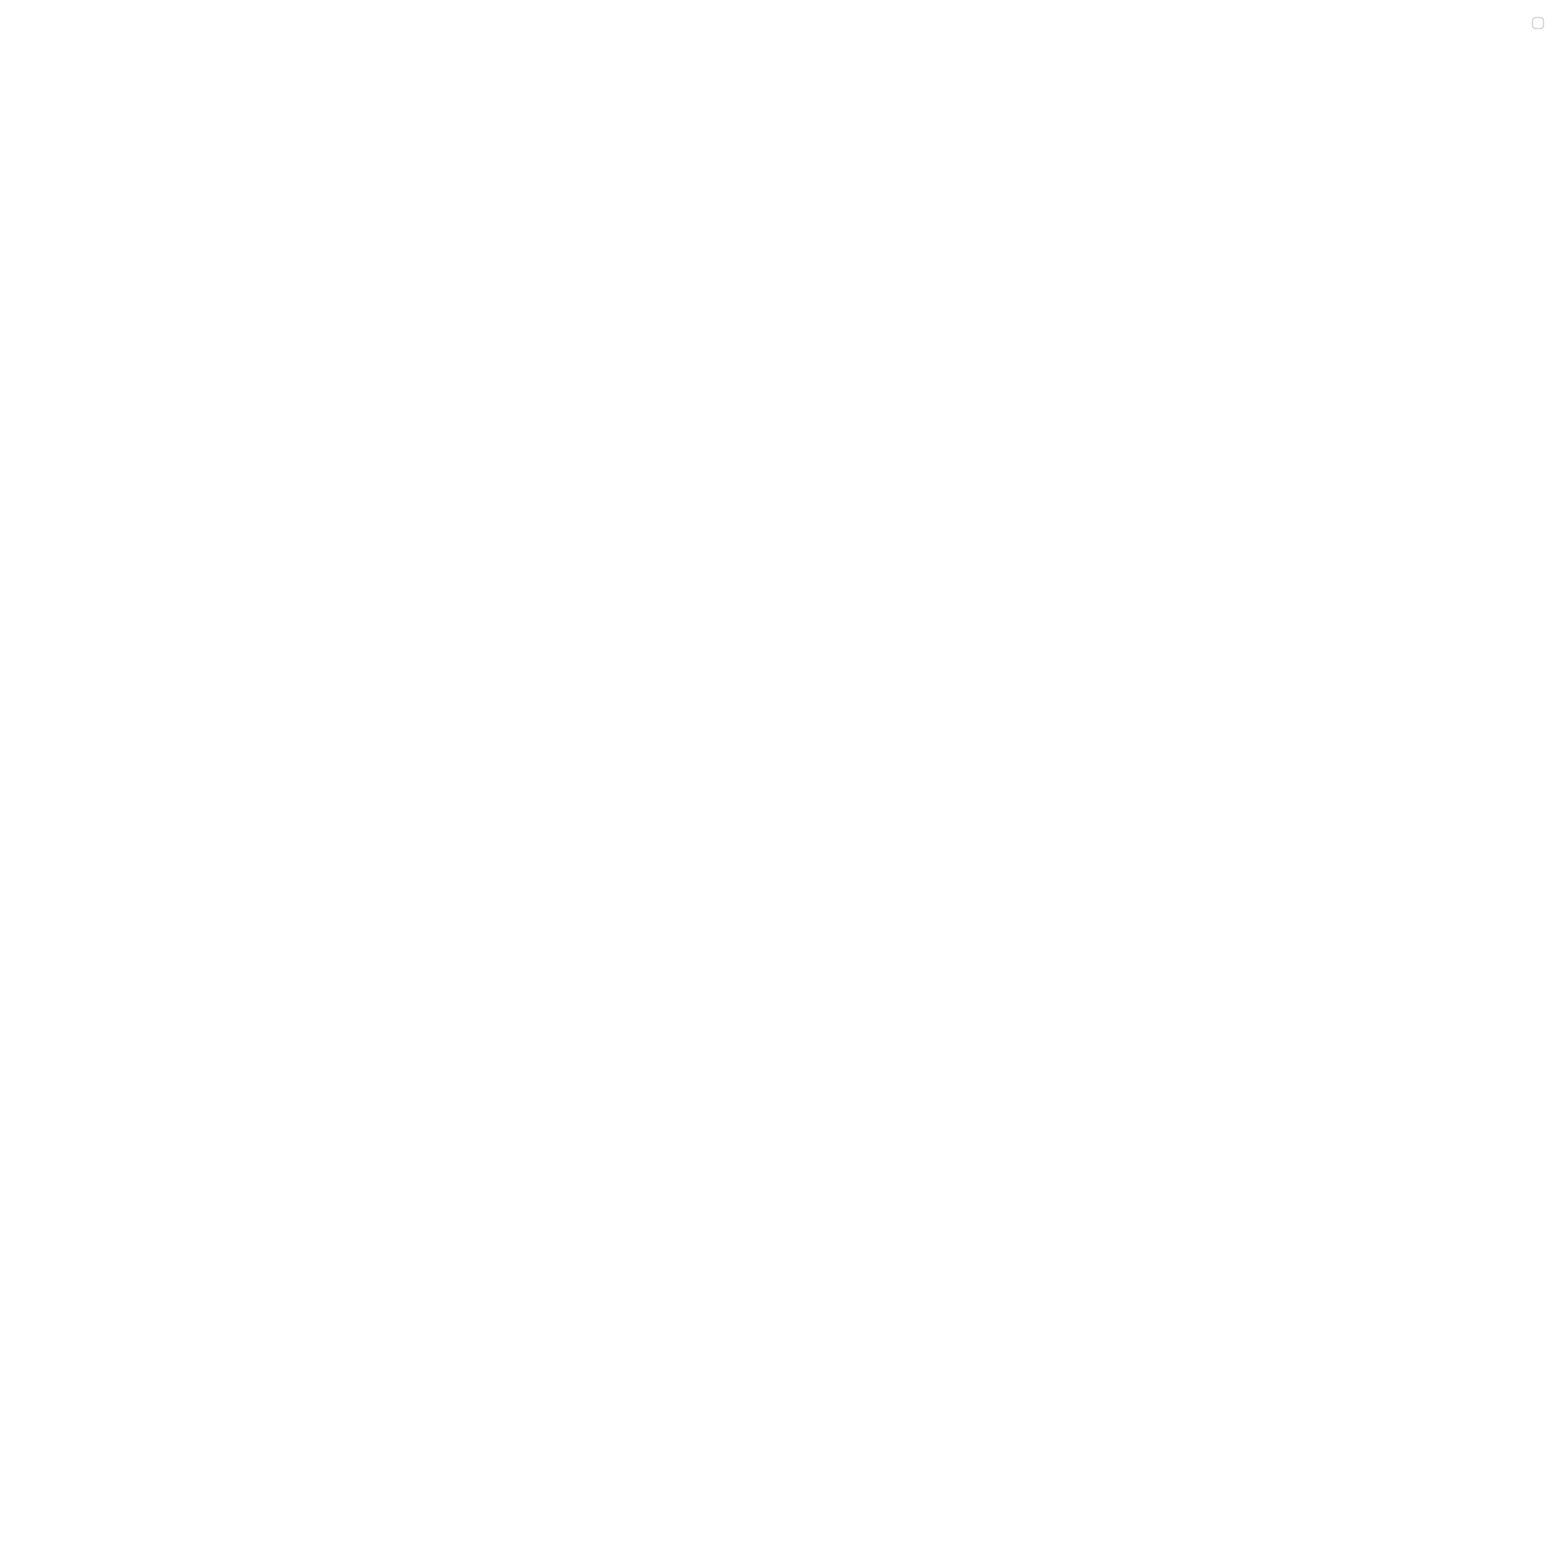

In [41]:
plt.figure(figsize=(20,20))
plt.pie(province_jumlah_penduduk_case)
plt.legend(unique_provinces, loc='best')
plt.show()